# Regression polynomiale

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

Le but est d'élever des variables à des puissances supérieures pour améliorer la qualité de la régression. Par exemple, si on a une variable $x$ et qu'on veut l'élever au carré, on peut créer une nouvelle variable $x^2$.

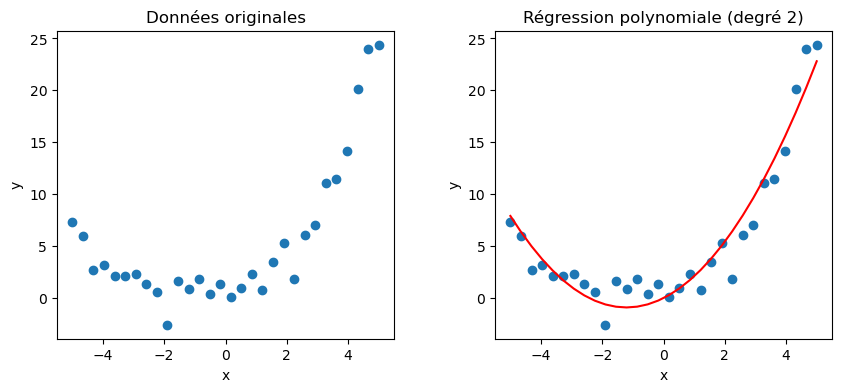

In [4]:
n = 30

# Générer des valeurs de x entre -5 et 5
x = np.linspace(-5, 5, n)

# Calculer y = x^2 pour les valeurs de x positives
y1 = np.where(x >= 0, x**2, 0)

# Calculer y = 0.5*x^2 pour les valeurs de x négatives
y2 = np.where(x < 0, 0.2*x**2, 0)

# Combiner y1 et y2
y = y1 + y2

# Ajouter du bruit aléatoire aux données
y = y + np.random.normal(0, 1.5, n)

# Préparer les données pour la régression polynomiale de degré 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.reshape(-1, 1))

# Entraîner le modèle de régression polynomiale
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Prédire avec le modèle polynomial
y_poly = poly_model.predict(X_poly)

# Créer une figure avec 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Tracer les données originales sur le subplot de gauche
ax1.scatter(x, y)
ax1.set_title("Données originales")
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Tracer les données et le modèle polynomial sur le subplot de droite
ax2.scatter(x, y)
ax2.plot(x, y_poly, color='r')
ax2.set_title("Régression polynomiale (degré 2)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Ajuster l'espacement entre les subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

Avec deux variables, nos modèle est $y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_2^2 + w_5 x_1 x_2$.

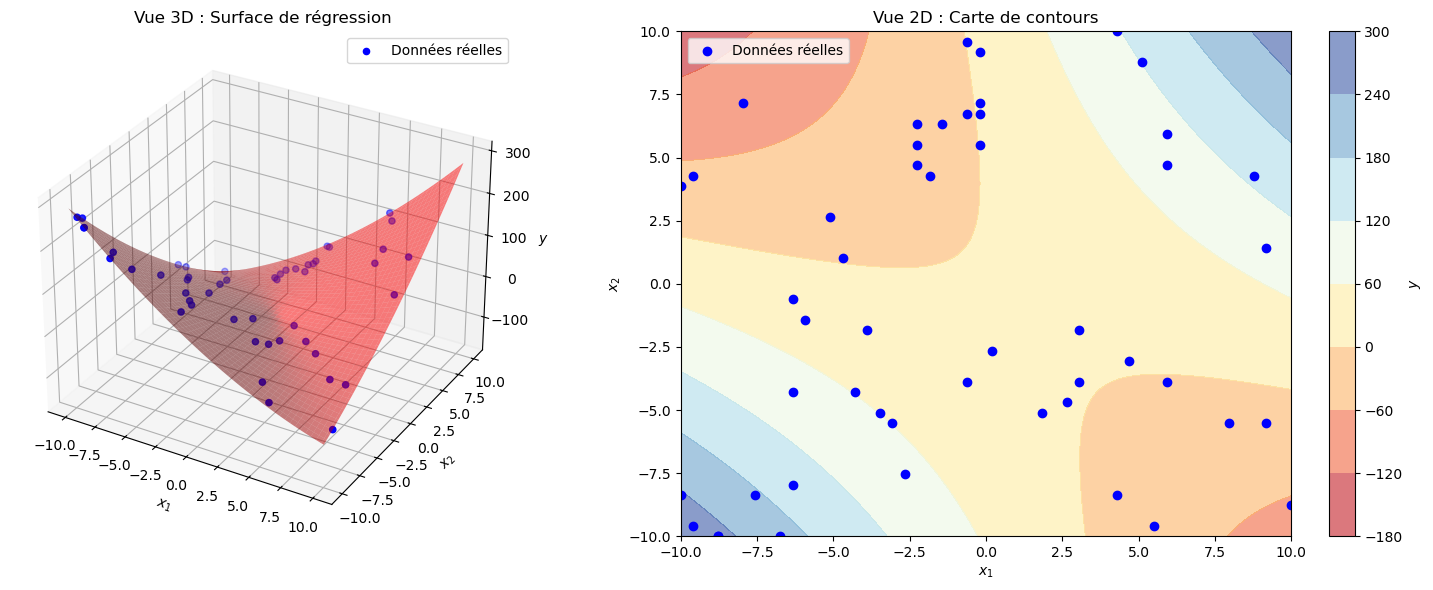

In [5]:
# Génération de données d'exemple pour x1 et x2
np.random.seed(0)
n_points = 50
x1 = np.linspace(-10, 10, n_points)
x2 = np.linspace(-10, 10, n_points)
x1_data = np.random.choice(x1, n_points)
x2_data = np.random.choice(x2, n_points)

# Définition des coefficients du modèle
w1 = 1.5
w2 = -2.0
w3 = 0.5
w4 = 0.3
w5 = 2.0
b = 5

# Calcul de y selon le modèle polynomiale à deux variables
y_data = w1 * x1_data + w2 * x2_data + w3 * x1_data**2 + w4 * x2_data**2 + w5 * x1_data * x2_data + b

# Création d'une grille pour visualiser la surface
X1, X2 = np.meshgrid(np.linspace(x1.min(), x1.max(), 100),
                     np.linspace(x2.min(), x2.max(), 100))
Z = w1 * X1 + w2 * X2 + w3 * X1**2 + w4 * X2**2 + w5 * X1 * X2 + b

# Création d'une figure avec deux subplots
fig = plt.figure(figsize=(16, 6))

# Subplot 1 : Vue 3D (Surface de régression)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1_data, x2_data, y_data, color='b', label="Données réelles")
ax1.plot_surface(X1, X2, Z, color='r', alpha=0.5)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$y$')
ax1.set_title("Vue 3D : Surface de régression")
ax1.legend()

# Subplot 2 : Vue 2D (Carte de contours)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, cmap='RdYlBu', alpha=0.6)
ax2.scatter(x1_data, x2_data, color='b', label="Données réelles")
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title("Vue 2D : Carte de contours")
ax2.legend()
fig.colorbar(contour, ax=ax2, label='$y$')

plt.tight_layout()
plt.show()

### Gérer la multicolinéarité

Pour diagnostiquer la multicolinéarité, on peut utiliser la matrice de corrélation. Si deux variables sont très corrélées, on peut en supprimer une. On peut aussi utiliser le VIF (Variance Inflation Factor) pour quantifier la multicolinéarité. Un VIF supérieur à 10 indique une multicolinéarité élevée. Mais aussi un pair plot

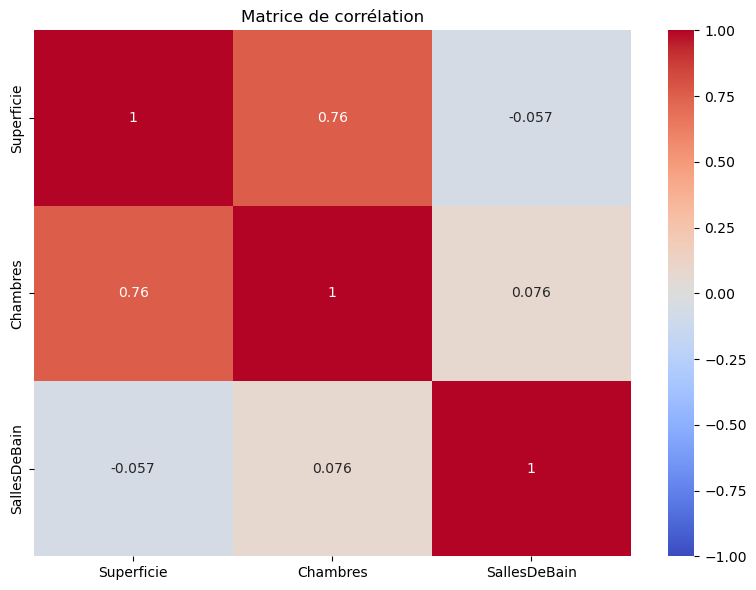

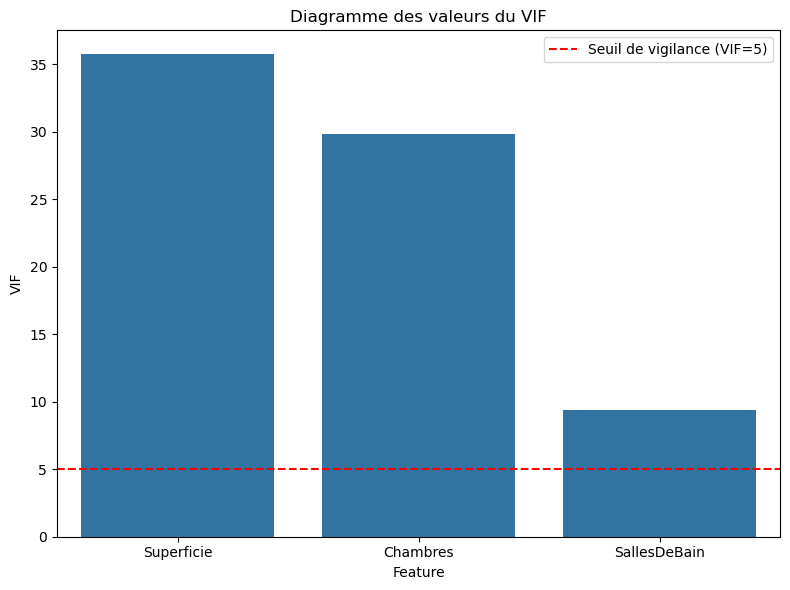

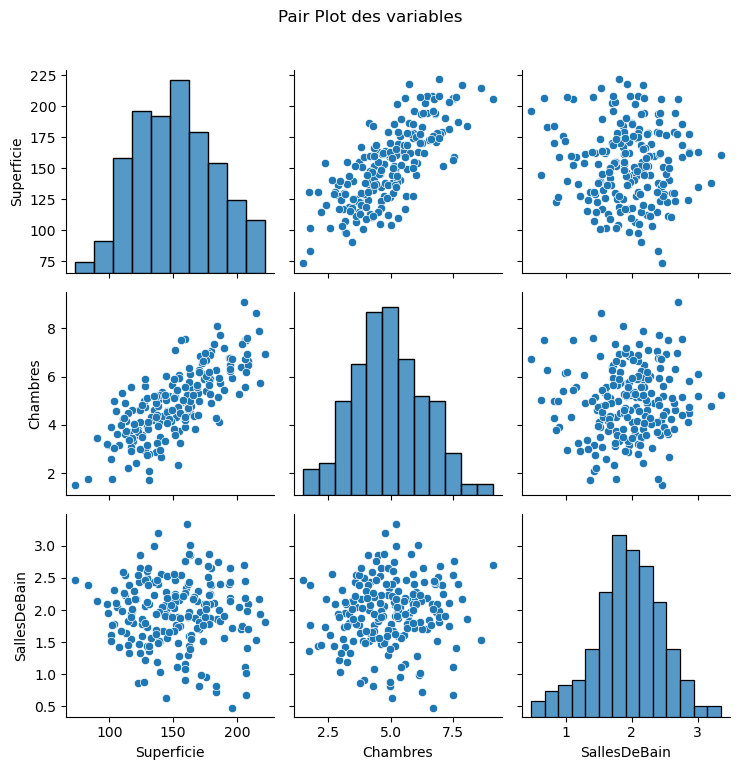

In [9]:
# Initialisation pour la reproductibilité
np.random.seed(0)
n = 200

# Génération de données synthétiques simulant des caractéristiques immobilières
superficie = np.random.normal(150, 30, n)         # Superficie en m²
chambres = superficie / 30 + np.random.normal(0, 1, n)  # Corrélée à la superficie (plus d'espace = plus de chambres)
sdb = np.random.normal(2, 0.5, n)                   # Nombre de salles de bain, variable moins corrélée

# Création d'un DataFrame
df = pd.DataFrame({
    "Superficie": superficie,
    "Chambres": chambres,
    "SallesDeBain": sdb
})

# 1. Matrice de corrélation
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# 2. Calcul et diagramme des valeurs de VIF
X = df[['Superficie', 'Chambres', 'SallesDeBain']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

plt.figure(figsize=(8,6))
sns.barplot(x="Feature", y="VIF", data=vif_data)
plt.axhline(y=5, color='r', linestyle='--', label="Seuil de vigilance (VIF=5)")
plt.title("Diagramme des valeurs du VIF")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Pair plot pour observer les relations entre variables
sns.pairplot(df)
plt.suptitle("Pair Plot des variables", y=1.02)
plt.tight_layout()
plt.show()